In [14]:
!ls /data/projects/nckf/cmip6/historical/EC-Earth3/r10i1p1f1/Omon/tos

tos_Omon_EC-Earth3_historical_r10i1p1f1_gn_185001-201412.nc


In [13]:
import xarray as xr
tos = xr.open_dataset("/data/projects/nckf/cmip6/historical/EC-Earth3/r10i1p1f1/Omon/tos/tos_Omon_EC-Earth3_historical_r10i1p1f1_gn_185001-201412.nc")


In [5]:
tos

<xarray.Dataset> Size: 841MB
Dimensions:         (time: 1980, bnds: 2, j: 292, i: 362, vertices: 4)
Coordinates:
  * time            (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 2014-1...
    longitude       (j, i) float32 423kB ...
    latitude        (j, i) float32 423kB ...
  * i               (i) int32 1kB 1 2 3 4 5 6 7 ... 356 357 358 359 360 361 362
  * j               (j) int32 1kB 1 2 3 4 5 6 7 ... 286 287 288 289 290 291 292
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds       (time, bnds) datetime64[ns] 32kB ...
    longitude_bnds  (j, i, vertices) float32 2MB ...
    latitude_bnds   (j, i, vertices) float32 2MB ...
    tos             (time, j, i) float32 837MB ...
Attributes: (12/51)
    CDI:                                Climate Data Interface version 1.9.9r...
    history:                            Wed Mar 09 10:35:43 2022: cdo mergeti...
    source:                             EC-Earth3 (2018): \naerosol: none\nat...
    institution:                        AEMET, Spain; BSC, Spain; CNR-ISAC, I...
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        CMIP
    ...                                 ...
    branch_time_in_child:               0.0
    nominal_resolution:                 100 km
    parent_variant_label:               r1i1p1f1
    tracking_id:                        hdl:21.14100/82234307-7805-460a-bce4-...
    latest_applied_cmor_fixer_version:  v3.0
    CDO:                                Climate Data Operators version 1.9.9r...

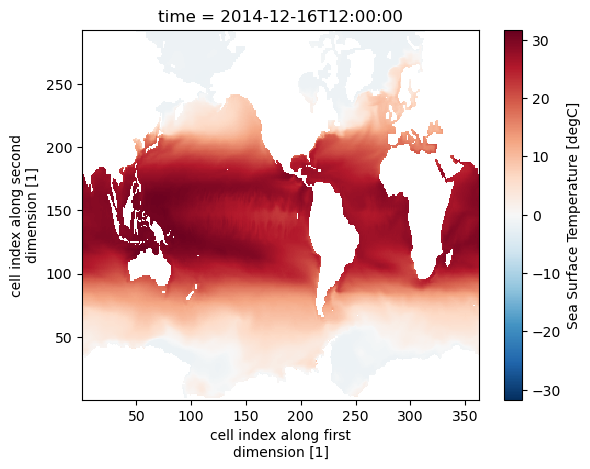

In [6]:
tos.tos.isel(time=1979).plot()

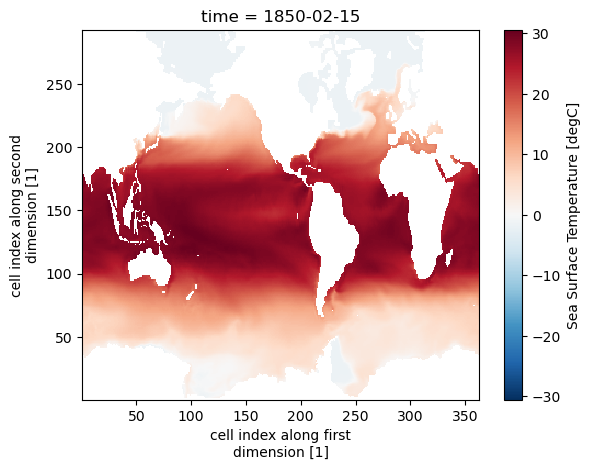

In [7]:
tos.tos.isel(time=1).plot()

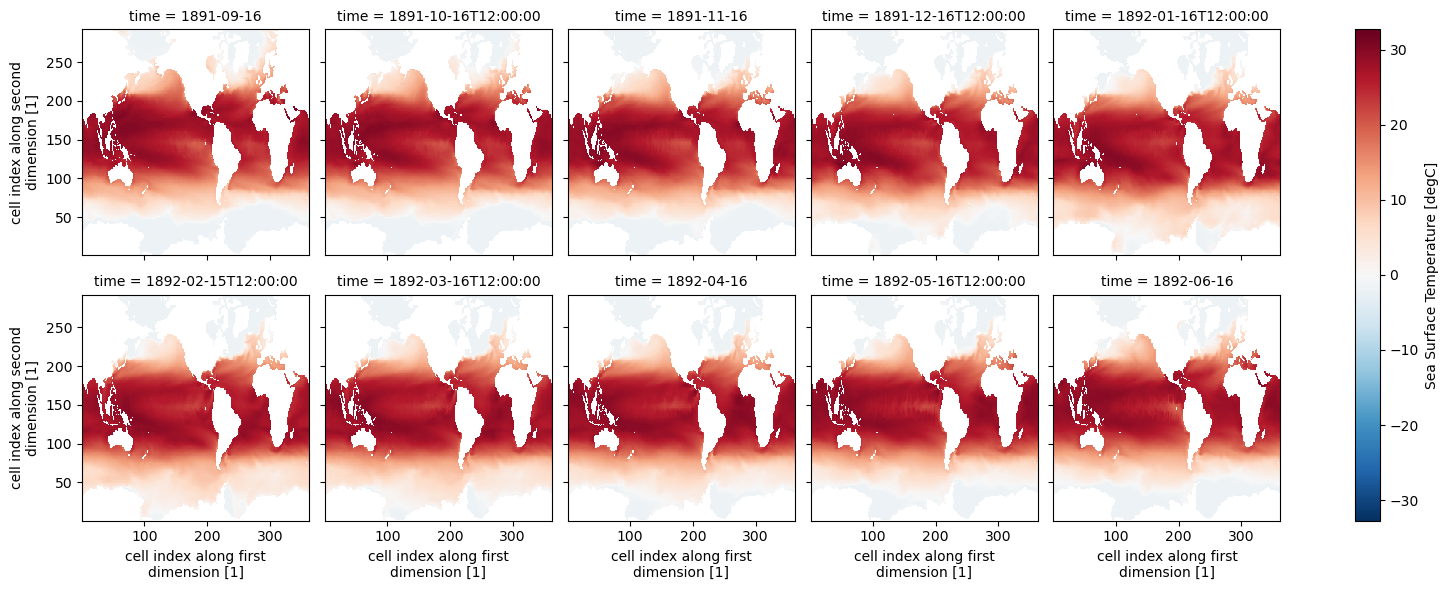

In [8]:
tos.tos.isel(time=slice(500,510)).plot(col="time",col_wrap=5)

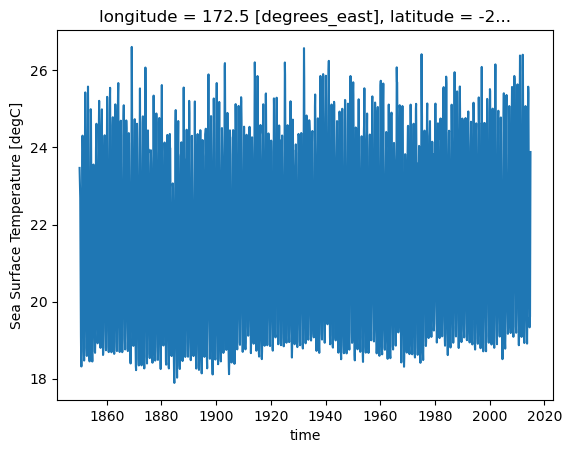

In [9]:
tos.tos.isel(i=100,j=100).plot()

In [1]:
!ls /dmidata/projects/nckf/cmip6/historical/EC-Earth3/r10i1p1f1/Omon/so/

so_Omon_EC-Earth3_historical_r10i1p1f1_gn_185001-201412.nc


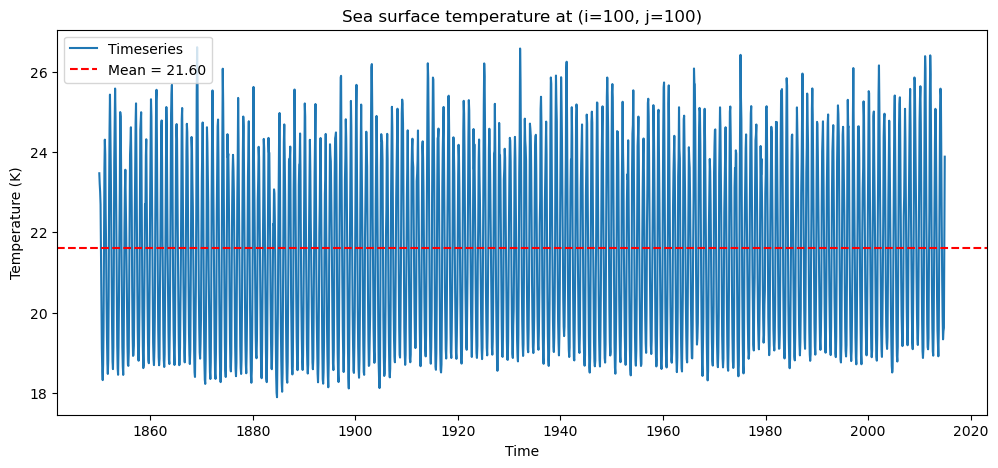

In [10]:
import matplotlib.pyplot as plt

# Extract the point
point_timeseries = tos.tos.isel(i=100, j=100)

# Plot the full timeseries
point_timeseries.plot(figsize=(12,5), label="Timeseries")

# Add mean as horizontal line
mean_val = point_timeseries.mean().item()  # convert to float
plt.axhline(mean_val, color="red", linestyle="--", label=f"Mean = {mean_val:.2f}")

# Labels & legend
plt.title("Sea surface temperature at (i=100, j=100)")
plt.ylabel("Temperature (K)")
plt.xlabel("Time")
plt.legend()
plt.show()



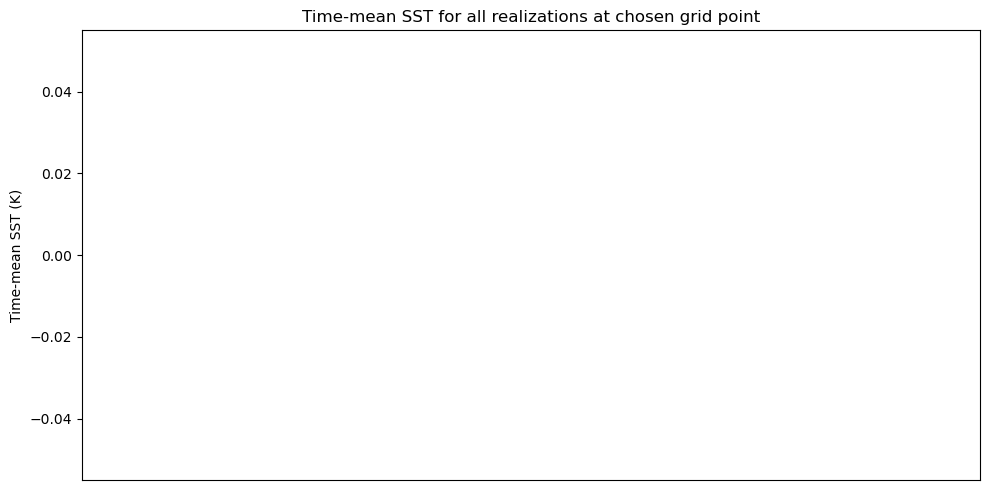

In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import glob

# Path to all ensemble member files
filelist = sorted(glob.glob("/dmidata/projects/nckf/cmip6/historical/EC-Earth3/r*/Omon/tos/*.nc"))

# Choose a grid point (indices)
i_pt, j_pt = 100, 100
x_pt, y_pt = 100, 100

realization_means = []

for f in filelist:
    ds = xr.open_dataset(f)
    
    # Pick the point depending on available dims
    if "i" in ds.tos.dims and "j" in ds.tos.dims:
        ts = ds.tos.isel(i=i_pt, j=j_pt)
    elif "x" in ds.tos.dims and "y" in ds.tos.dims:
        ts = ds.tos.isel(x=x_pt, y=y_pt)
    else:
        raise ValueError(f"Unknown grid dimensions in file {f}: {ds.tos.dims}")
    
    realization_means.append(ts.mean().item())

# Plot bar chart of all realizations
plt.figure(figsize=(10,5))
plt.bar(range(len(realization_means)), realization_means)
plt.xticks(range(len(realization_means)), [f"r{i+1}" for i in range(len(realization_means))], rotation=45)
plt.ylabel("Time-mean SST (K)")
plt.title("Time-mean SST for all realizations at chosen grid point")
plt.tight_layout()
plt.show()





In [12]:
!ls /dmidata/projects/nckf/cmip6/historical

ls: cannot access '/dmidata/projects/nckf/cmip6/historical': Permission denied
